In [ ]:
#Analyzing housing prices data in Bangalore and prediction 

In [ ]:
#import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [11]:

df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#show the shape of data frame
df.shape

(13320, 9)

In [ ]:
#EXPLORATORY ANALYSIS

In [38]:
#check columns of the data
df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft'],
      dtype='object')

In [6]:
#More information about data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#Know more about the data 
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [39]:
#check if there are nulls or not in our data
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False,False
13317,False,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False,False


In [40]:
#check if there are some null values or not in each column
df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5502
total_sqft          46
bath                73
balcony            609
price                0
price_per_sqft      46
dtype: int64

In [41]:
#Grouping data by the area type
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [42]:
#Removing data that is less relevant
df = df.drop(["area_type","society","balcony","availability"], axis = "columns")

In [43]:
df.shape

(13320, 6)

In [44]:
#Remove null values
df = df.dropna()

In [45]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

In [46]:
df.shape

(13201, 6)

In [47]:
#FEATURE ENGINEERING
#Set unique functionality on the size feature


In [48]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [49]:
df['size'] = df['size'].astype(str)

In [50]:
#create new column BHK and select numbers only
df['BHK'] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [51]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2


In [52]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [53]:
#explore the total sqft feature in our dataset by creating a function to check float
def is_float(x):
    try: 
        float(x)
    except:
        return False
    return True

In [54]:
#We apply the function and see the range of sqft in each case. 
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,price_per_sqft,BHK


In [55]:
#We observe different ranges and formats in the total_sqft. Cases such as the 34.46sq. Meter can be 
#converted using unit conversion. Or just drop some of these cases to keep everything simple 

In [56]:
#split the range, add them and then take the average - can help calculate price per sqft
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [58]:
df['total_sqft'] = df['total_sqft'].astype(str)

In [59]:
df = df.copy()
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,3247.863248,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,7467.057101,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,18181.818182,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,4828.244275,3
9,other,6 Bedroom,1020.0,6.0,370.00,36274.509804,6


In [60]:
#create a new feature of price per sqft
df = df.copy()
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head(10)

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,3247.863248,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,7467.057101,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,18181.818182,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,4828.244275,3
9,other,6 Bedroom,1020.0,6.0,370.00,36274.509804,6


In [61]:
#With this we need to do a dimension reduction for the categorical variable to reduce the number of locations

In [62]:
#We have elements in the column location as float and we need to change all into same data type.
df['location'] = df['location'].astype(str)

In [63]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

other                        2863
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
2nd Phase Judicial Layout      11
Pattandur Agrahara             11
Bommenahalli                   11
Banjara Layout                 11
Thyagaraja Nagar               10
Name: location, Length: 242, dtype: int64

In [64]:
len(location_stats[location_stats<=10])

1

In [65]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Thyagaraja Nagar    10
Name: location, dtype: int64

In [66]:
#locations not in above categories
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

241

In [67]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2


In [68]:
#check all outliers and remove them -areas less than 300 sqft


In [69]:
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK
9,other,6 Bedroom,1020.0,6.0,370.0,36274.509804,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,33333.333333,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,10660.980810,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,6296.296296,8
70,other,3 Bedroom,500.0,3.0,100.0,20000.000000,3


In [70]:
df = df[~(df.total_sqft/df.BHK<300)]
df.shape

(12457, 7)

In [71]:
#Check additional outliers from description of mean and std 
df.describe()

,total_sqft,bath,price,price_per_sqft,BHK
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,1590.190715,2.562816,111.185938,6308.427888,2.649033
std,1260.354203,1.080239,152.197424,4167.968413,0.976012
min,300.000000,1.000000,9.000000,267.829813,1.000000
25%,1115.000000,2.000000,49.000000,4210.526316,2.000000
50%,1300.000000,2.000000,70.000000,5294.117647,3.000000
75%,1700.000000,3.000000,115.000000,6916.666667,3.000000
max,52272.000000,16.000000,3600.000000,176470.588235,16.000000


In [72]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape
    

(10243, 7)

In [73]:
df.head()


,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2


In [74]:
# VISUALIZING THE DATA

In [75]:
# Scatterplot for 2 and 3 bedroom houses

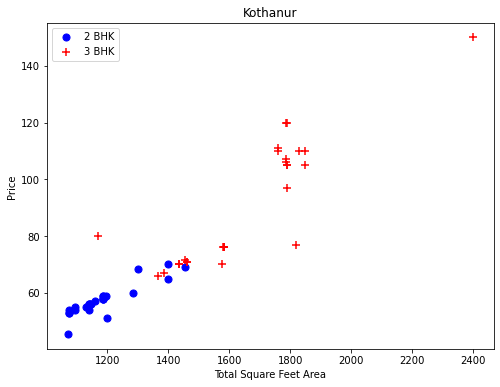

In [76]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='red', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Kothanur")

Text(0, 0.5, 'Count')

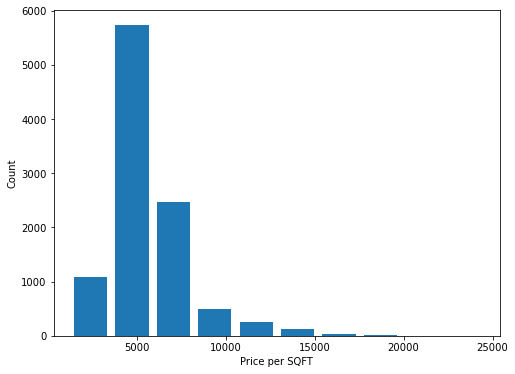

In [77]:
# Histogram for price per sqft vs Count
plt.hist(df.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per SQFT")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

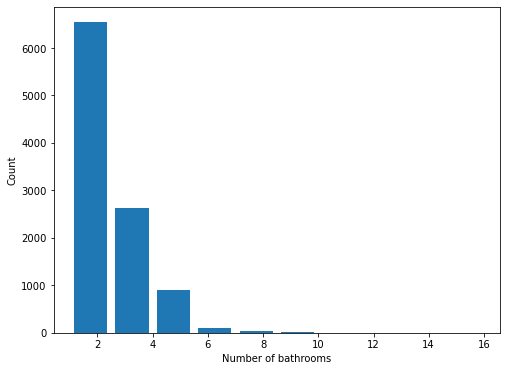

In [78]:
# Histogram for number of Bathrooms by count
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [79]:
# From the hist, we dig further on number of bedrooms and therefore discover more anomalies on our data
df[df.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft,BHK
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,4000.000000,10
8484,other,10 BHK,12000.0,12.0,525.0,4375.000000,10
8573,other,16 BHK,10000.0,16.0,550.0,5500.000000,16
9307,other,11 BHK,6000.0,12.0,150.0,2500.000000,11
9638,other,13 BHK,5425.0,13.0,275.0,5069.124424,13


In [80]:
# Remove data with rooms that more than 2 extra bathrooms
df[df.bath>df.BHK+2]

,location,size,total_sqft,bath,price,price_per_sqft,BHK
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,3252.032520,4
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,6428.571429,4
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,6423.034330,3
8409,other,6 BHK,11338.0,9.0,1000.0,8819.897689,6


In [81]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2


In [82]:
df.shape

(10243, 7)

In [83]:
#For Prediction-training&testing, we need to do hot encoding through dummies.
# Besides location and size, all other columns are numbers. lets create dummies for location and concatenate the datasets

In [84]:
dummies = pd.get_dummies(df.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
dummies.head(30)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Concatinate both sets
df = pd.concat([df, dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Remove the location column
df = df.drop('location',axis='columns')
df.head()

,size,total_sqft,bath,price,price_per_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,15017.543860,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,11901.840491,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,12533.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,130.0,10833.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,148.0,11983.805668,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Remove the prize and the size columns
X = df.drop(['price'],axis='columns')
X.head()

,size,total_sqft,bath,price_per_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,15017.543860,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,11901.840491,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,12533.333333,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,10833.333333,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,11983.805668,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X = df.drop(['size'],axis='columns')
X.head()

,total_sqft,bath,price,price_per_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,15017.543860,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,11901.840491,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,12533.333333,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,10833.333333,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,11983.805668,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [91]:
X=X.drop(['price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X = X.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X.shape

(10243, 243)

In [94]:
y.shape

(10243,)

In [95]:
# Predictive Modeling

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [97]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.7756666685584708

In [98]:
#We use Grid search CV(Crossvalidation) for 3 different Regression Models
# 1. Linear regression 2. lasso regression 3. decision tree regression

In [99]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80387257, 0.77924691, 0.75397818, 0.80671279, 0.80778116])

In [100]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [101]:
# MODEL EVALUATION


In [103]:
# MODEL TESTING

In [ ]:
find_best_model_using_gridsearchcv(X,y)

In [104]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [106]:
df.head()


,size,total_sqft,bath,price,price_per_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,15017.543860,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,11901.840491,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,12533.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,130.0,10833.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,148.0,11983.805668,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predict_price('Banashankari Stage V',2000, 3, 3)

In [108]:
# Linear regression works best for the dataset used.